#IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#LOAD DATASET

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving archive (4).zip to archive (4).zip


In [ ]:

zip_path = 'archive (4).zip'  # Replace with the actual path to your ZIP file
!unzip '{zip_path}'

Archive:  archive (4).zip
  inflating: athlete_events.csv      
  inflating: noc_regions.csv         


In [123]:
oly_gam = pd.read_csv('athlete_events.csv')
oly_gam.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [124]:
noc = pd.read_csv('noc_regions.csv')
noc.head(2)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles


In [125]:
# Merge the two csv files together join the tables using Left Join
merged_oly = oly_gam.merge(noc, how = 'left', on = "NOC")
#merged_oly = pd.merge(df1, df2, left_on='key1', right_on='key2')


#DATA WRANGLING/CLEANING

In [126]:
merged_oly.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN


In [127]:
#Get dataset info
merged_oly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [128]:
print('The No of Columns is  - ' ,merged_oly.shape[1])
print('The No of Rows is  - ' ,merged_oly.shape[0])

The No of Columns is  -  17
The No of Rows is  -  271116


In [129]:
#drop unnamed column as it is relevant to our datatset
merged_oly= merged_oly.drop(columns = ['ID'])

In [130]:
#Check for all missing values
merged_oly.isnull().sum()

Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

In [131]:
merged_oly.columns

Index(['Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

In [132]:
merged_oly.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,271116,134732,Robert Tait McKenzie,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,271116,2,M,196594,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,261642.0,NaN,NaN,NaN,25.556898,6.393561,10.0,21.0,24.0,28.0,97.0
Height,210945.0,NaN,NaN,NaN,175.33897,10.518462,127.0,168.0,175.0,183.0,226.0
Weight,208241.0,NaN,NaN,NaN,70.702393,14.34802,25.0,60.0,70.0,79.0,214.0
Team,271116,1184,United States,17847,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOC,271116,230,USA,18853,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Games,271116,51,2000 Summer,13821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,271116.0,NaN,NaN,NaN,1978.37848,29.877632,1896.0,1960.0,1988.0,2002.0,2016.0
Season,271116,2,Summer,222552,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
merged_oly['Age'].fillna(oly_gam['Age'].mean(), inplace=True)
merged_oly['Height'].fillna(oly_gam['Height'].mean(), inplace=True)
merged_oly['Weight'].fillna(oly_gam['Weight'].mean(), inplace=True)
merged_oly['Medal'].fillna('None', inplace=True)
merged_oly['notes'].fillna('None', inplace=True)
merged_oly['region'].fillna(merged_oly['Team'], inplace=True) # Fill missing values in 'feature1' with values from 'feature2'


In [134]:
merged_oly.isnull().sum()

Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
region    0
notes     0
dtype: int64

<ipython-input-135-23c978d0b50c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.tril(np.ones_like(merged_oly.corr(), dtype= bool))
<ipython-input-135-23c978d0b50c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_oly.corr(), cmap='BrBG', mask=mask, vmin=-1, vmax=1, fmt = '.3f', annot=True)


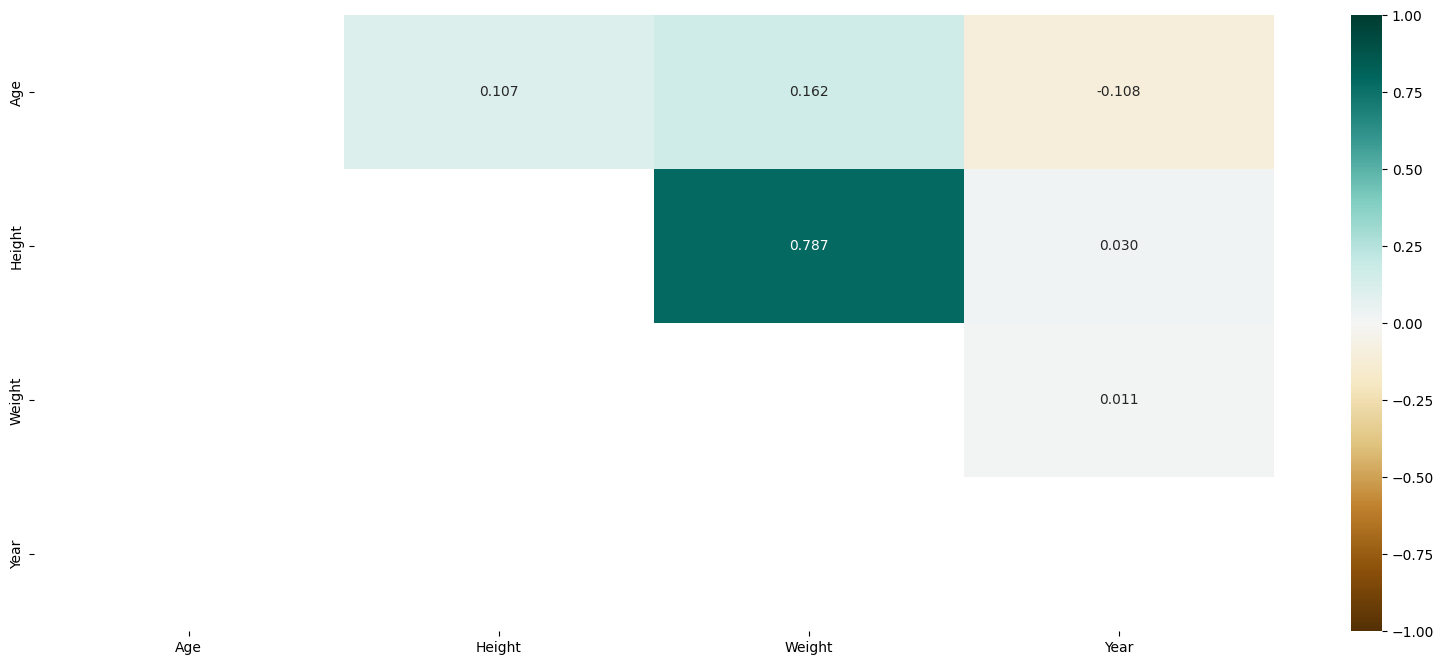

In [135]:
# plotting a correlation matrix as a heatmap;
plt.figure(figsize= (20, 8))
mask = np.tril(np.ones_like(merged_oly.corr(), dtype= bool))
sns.heatmap(merged_oly.corr(), cmap='BrBG', mask=mask, vmin=-1, vmax=1, fmt = '.3f', annot=True)
plt.show()

In [136]:
merged_oly.Season.value_counts().sort_values(ascending=False)

Summer    222552
Winter     48564
Name: Season, dtype: int64

<Axes: xlabel='Season', ylabel='count'>

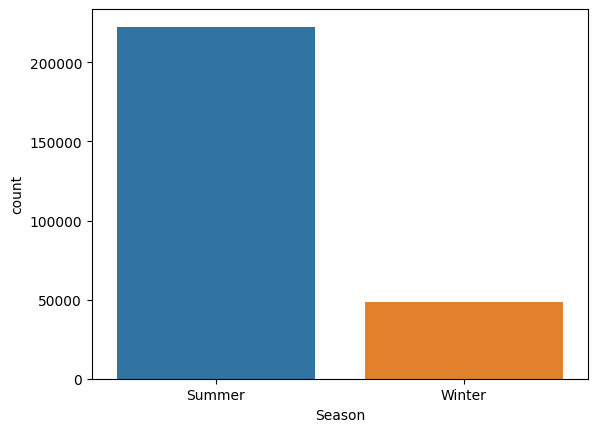

In [137]:
sns.countplot(x='Season',data= merged_oly)

In [138]:
winter_games = merged_oly[merged_oly.Season == 'Winter'].Sport.unique()
winter_games

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [139]:
summer_games = merged_oly[merged_oly.Season == 'Summer'].Sport.unique()
summer_games

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [140]:
merged_oly.select_dtypes(include = 'object').nunique() #check no of unique values

Name      134732
Sex            2
Team        1184
NOC          230
Games         51
Season         2
City          42
Sport         66
Event        765
Medal          4
region       213
notes         22
dtype: int64

In [141]:
merged_oly.duplicated().sum()

1385

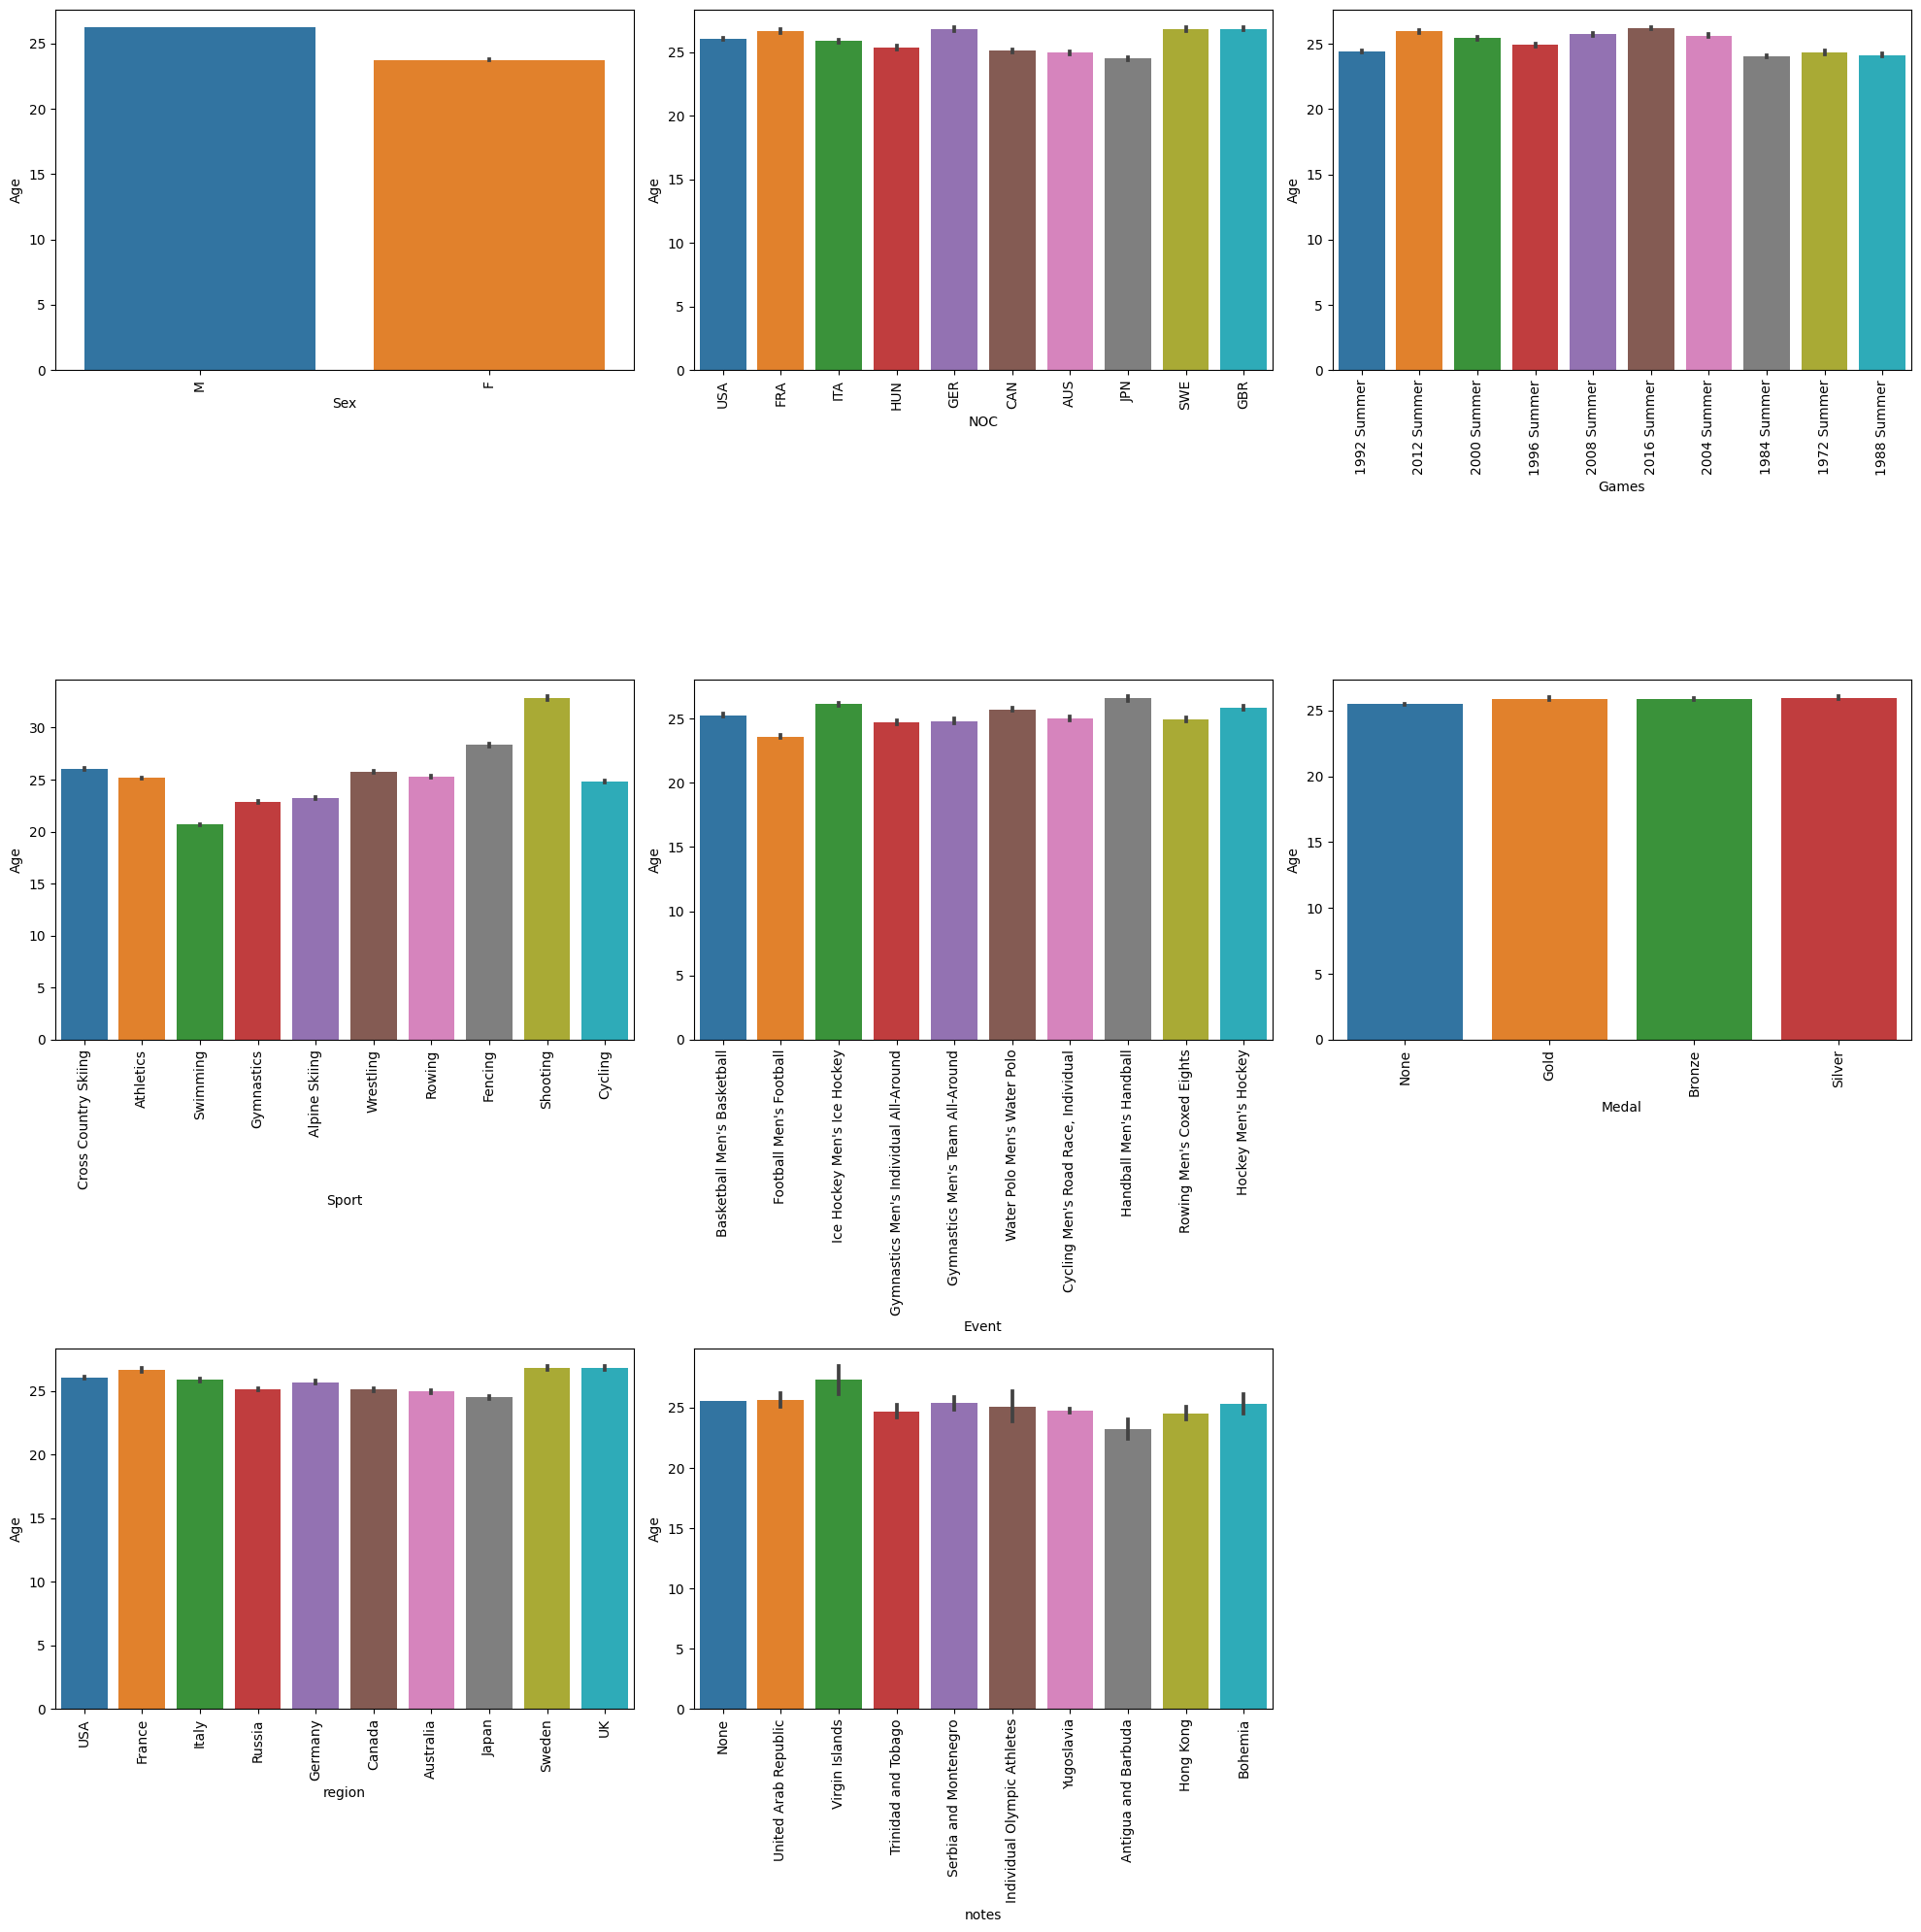

In [142]:

# List of categorical variables to plot
cat_vars = ['Sex', 'NOC', 'Games', 'Sport', 'Event', 'Medal', 'region', 'notes']

# Create a figure with subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
axs = axs.flatten()  # Instead of ravel(), use flatten() to reshape the array

# Create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    unique_count = len(merged_oly[var].unique())  # Count unique values for the variable
    if unique_count > 10:
        top_10 = merged_oly[var].value_counts().nlargest(10).index.tolist()  # Get top 10 values
        data_subset = merged_oly[merged_oly[var].isin(top_10)]  # Filter the DataFrame
    else:
        data_subset = merged_oly
    sns.barplot(x=var, y='Age', data=data_subset, ax=axs[i], estimator=np.mean)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# Adjust spacing between subplots
fig.tight_layout()

# Remove the eighth subplot if not required
if len(cat_vars) < 8:
    fig.delaxes(axs[7])

# Remove the ninth subplot if not required
if len(cat_vars) < 9:
    fig.delaxes(axs[8])

# Show plot
plt.show()


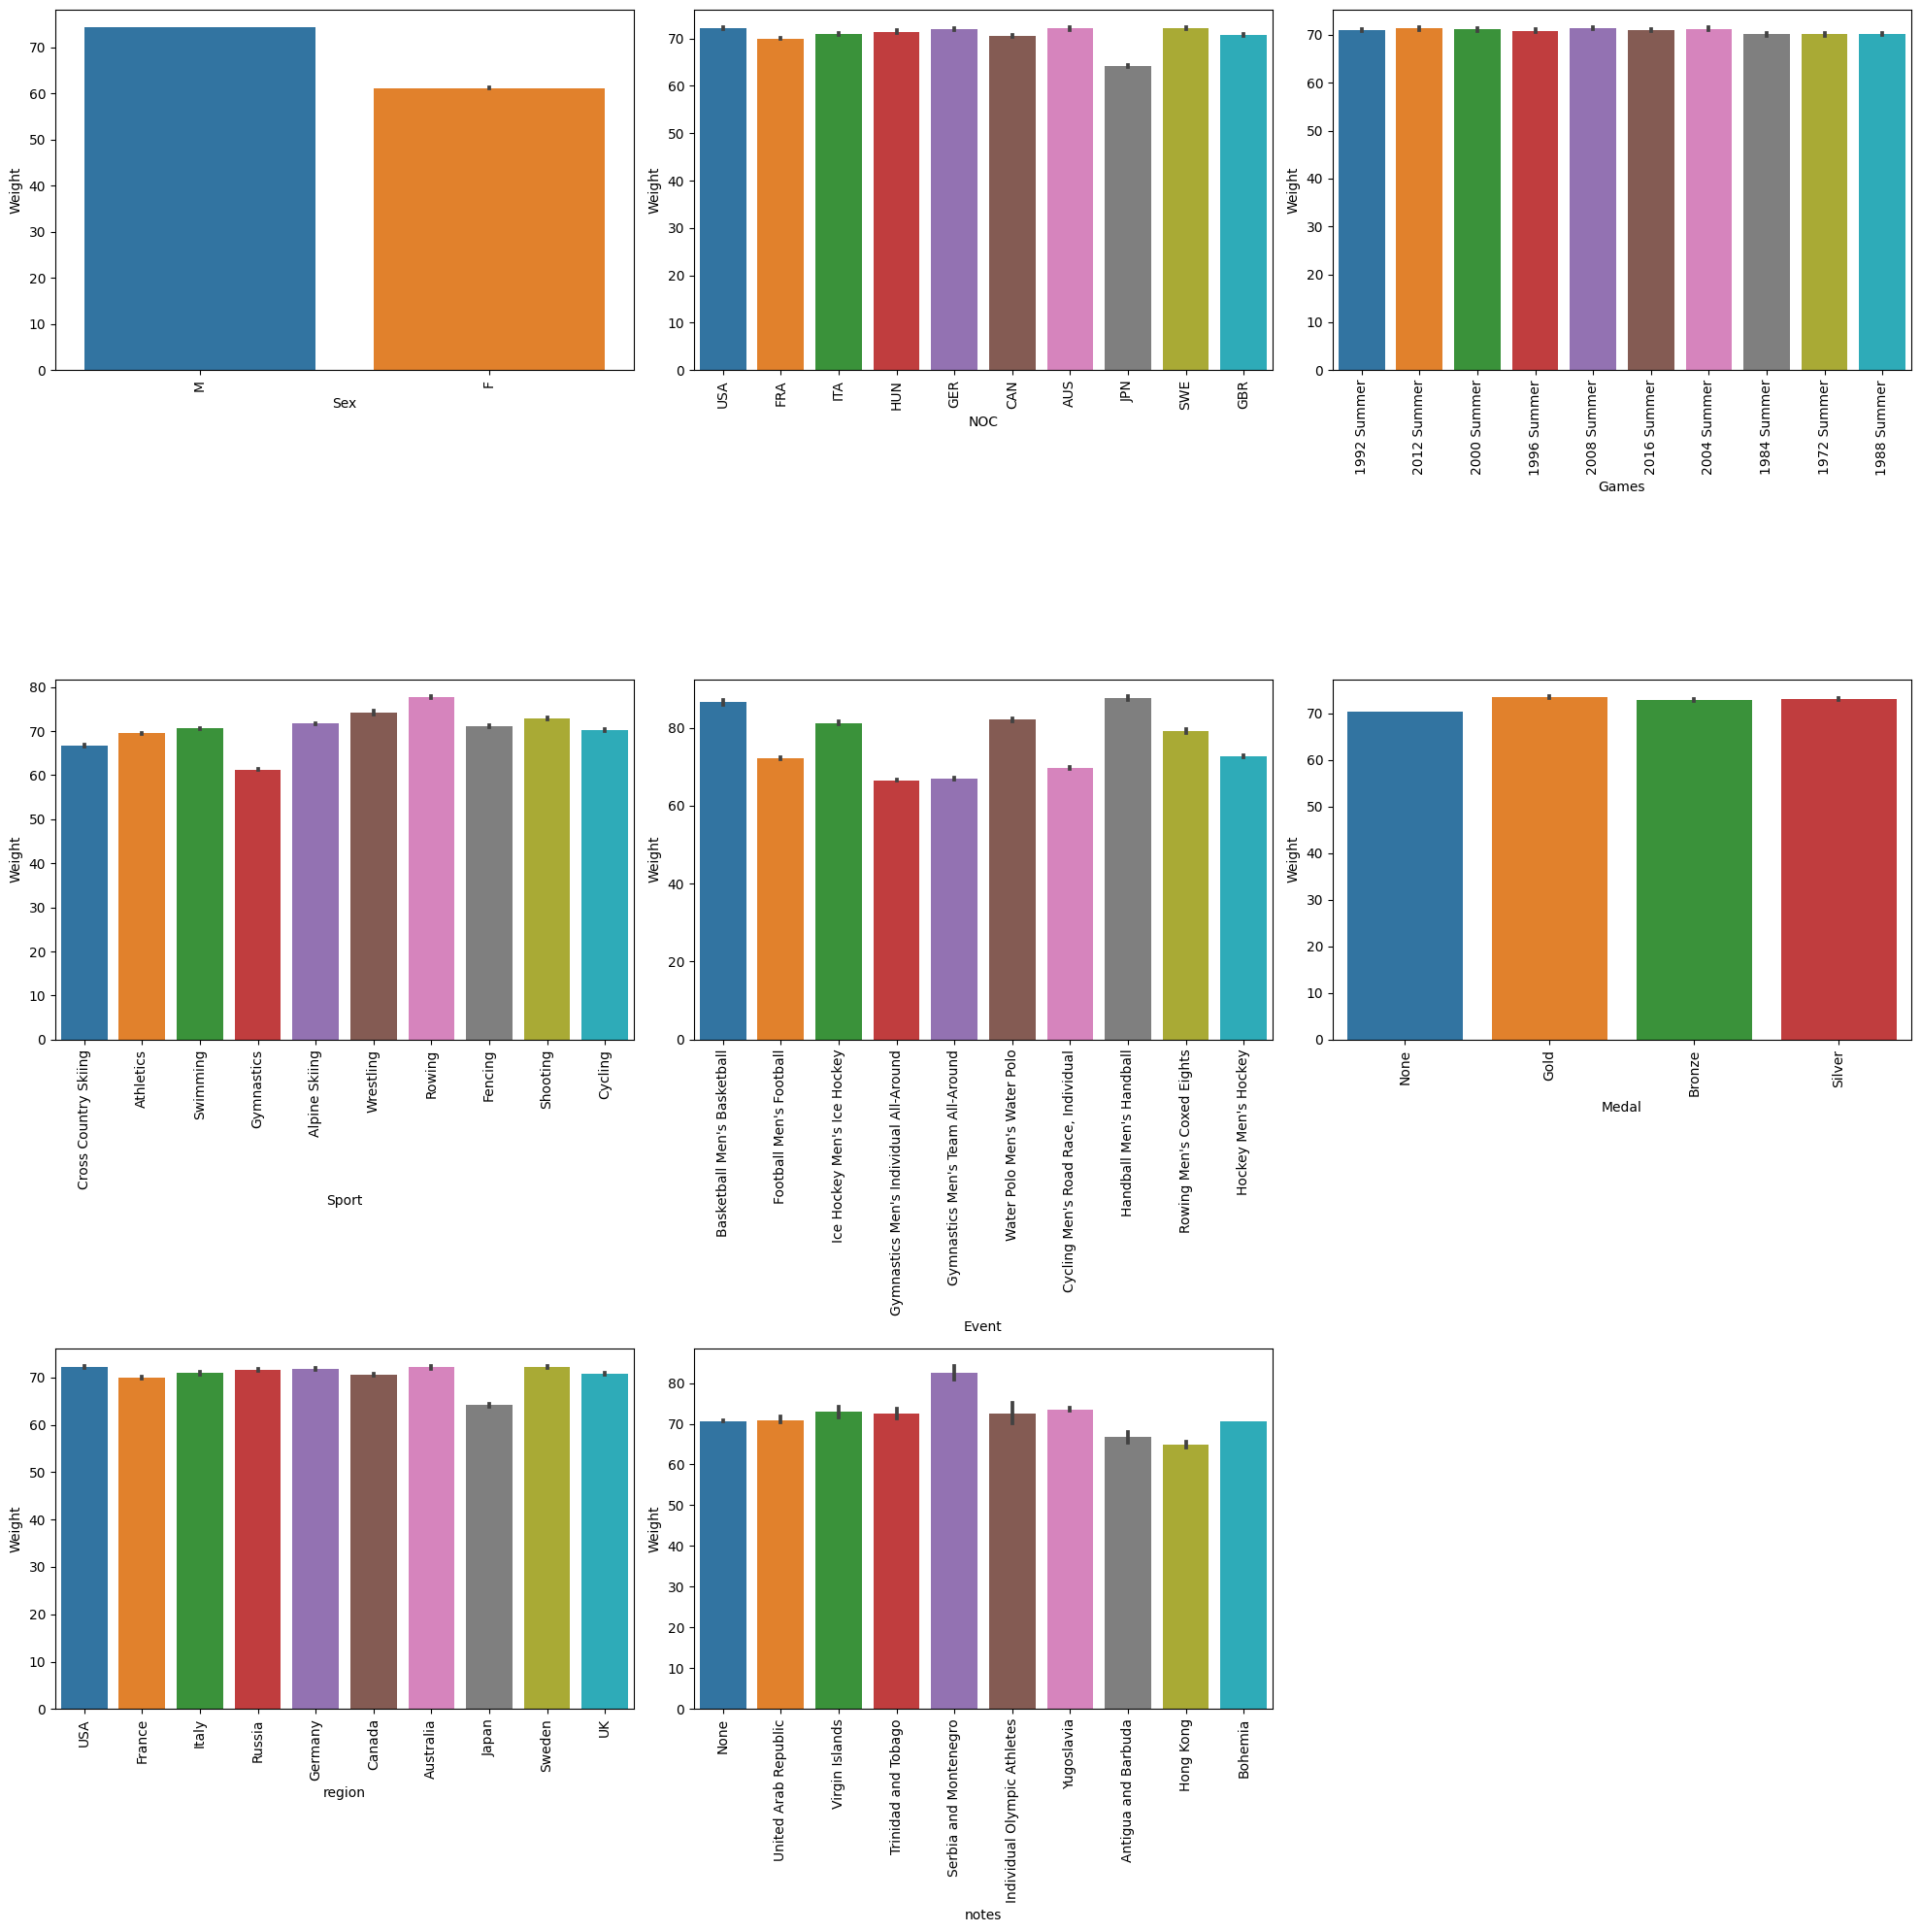

In [145]:
# List of categorical variables to plot
cat_vars = ['Sex', 'NOC', 'Games', 'Sport', 'Event', 'Medal', 'region', 'notes']

# Create a figure with subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
axs = axs.flatten()  # Instead of ravel(), use flatten() to reshape the array

# Create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    unique_count = len(merged_oly[var].unique())  # Count unique values for the variable
    if unique_count > 10:
        top_10 = merged_oly[var].value_counts().nlargest(10).index.tolist()  # Get top 10 values
        data_subset = merged_oly[merged_oly[var].isin(top_10)]  # Filter the DataFrame
    else:
        data_subset = merged_oly
    sns.barplot(x= var, y= 'Weight', data=data_subset, ax=axs[i], estimator=np.mean)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# Adjust spacing between subplots
fig.tight_layout()

# Remove the eighth subplot if not required
if len(cat_vars) < 8:
    fig.delaxes(axs[7])

# Remove the ninth subplot if not required
if len(cat_vars) < 9:
    fig.delaxes(axs[8])
    # Show plot
plt.show()

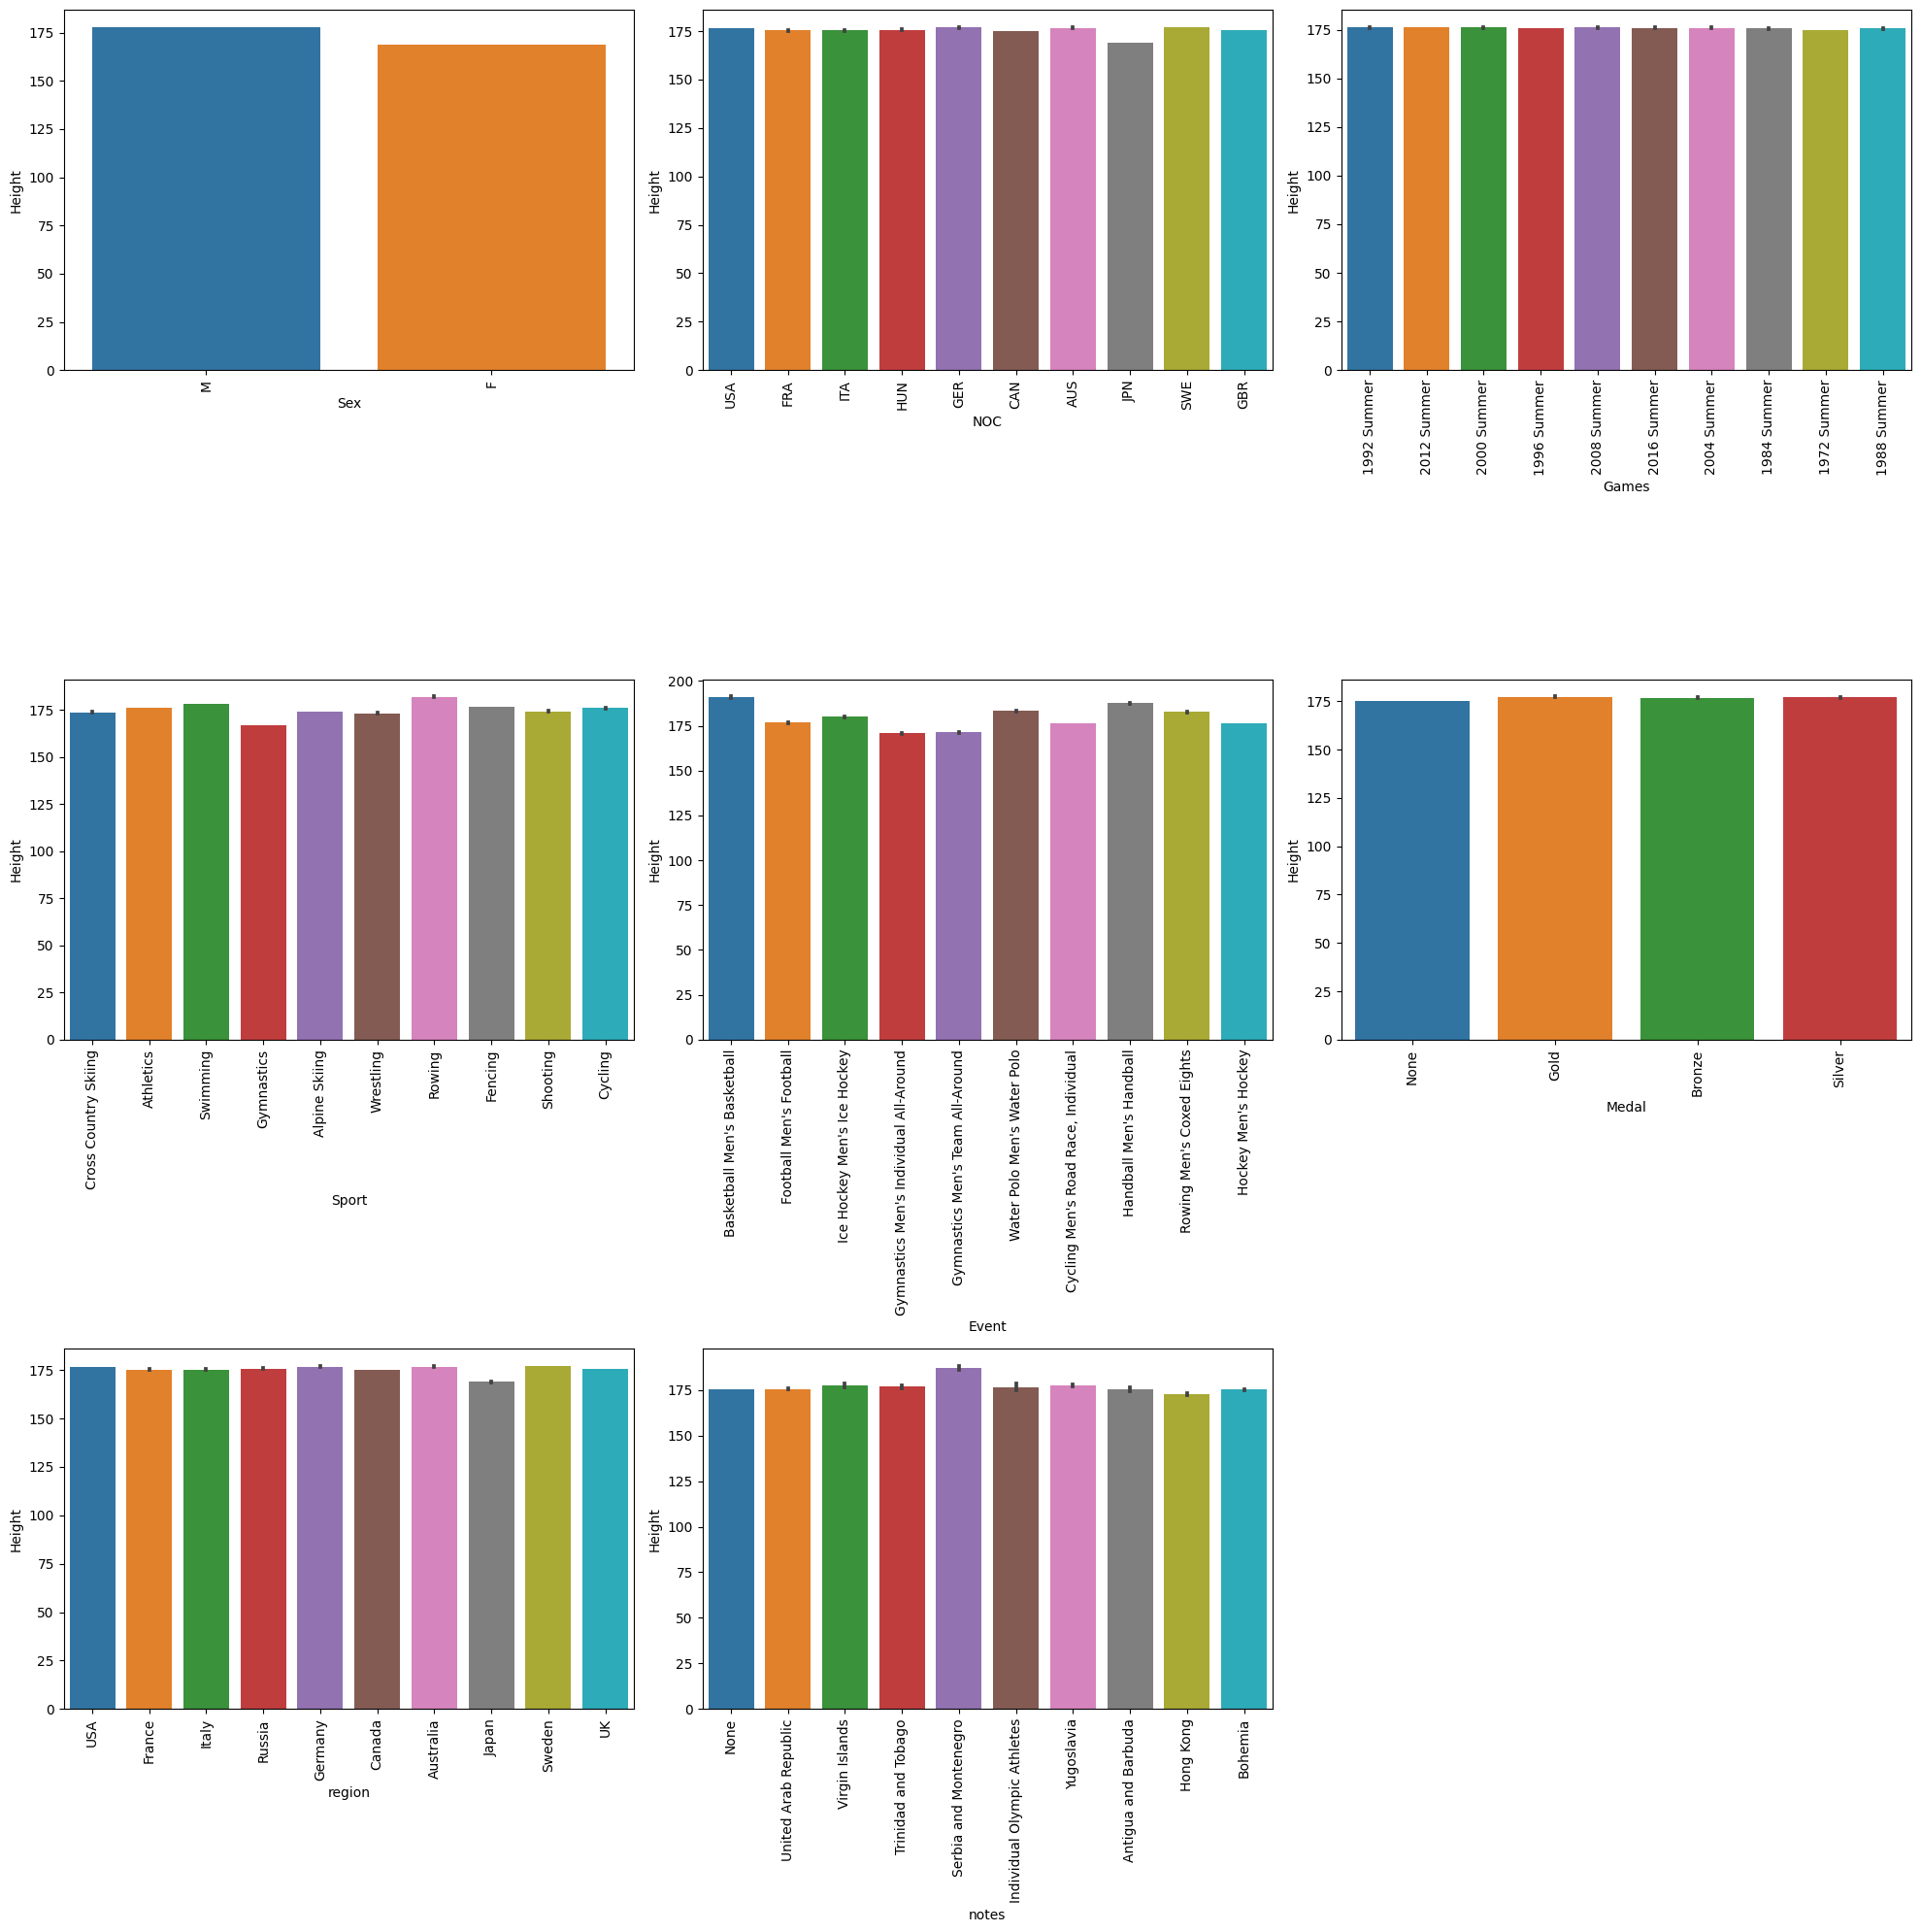

In [146]:
# List of categorical variables to plot
cat_vars = ['Sex', 'NOC', 'Games', 'Sport', 'Event', 'Medal', 'region', 'notes']

# Create a figure with subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
axs = axs.flatten()  # Instead of ravel(), use flatten() to reshape the array

# Create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    unique_count = len(merged_oly[var].unique())  # Count unique values for the variable
    if unique_count > 10:
        top_10 = merged_oly[var].value_counts().nlargest(10).index.tolist()  # Get top 10 values
        data_subset = merged_oly[merged_oly[var].isin(top_10)]  # Filter the DataFrame
    else:
        data_subset = merged_oly
    sns.barplot(x= var, y= 'Height', data=data_subset, ax=axs[i], estimator=np.mean)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# Adjust spacing between subplots
fig.tight_layout()

# Remove the eighth subplot if not required
if len(cat_vars) < 8:
    fig.delaxes(axs[7])

# Remove the ninth subplot if not required
if len(cat_vars) < 9:
    fig.delaxes(axs[8])
    # Show plot
plt.show()

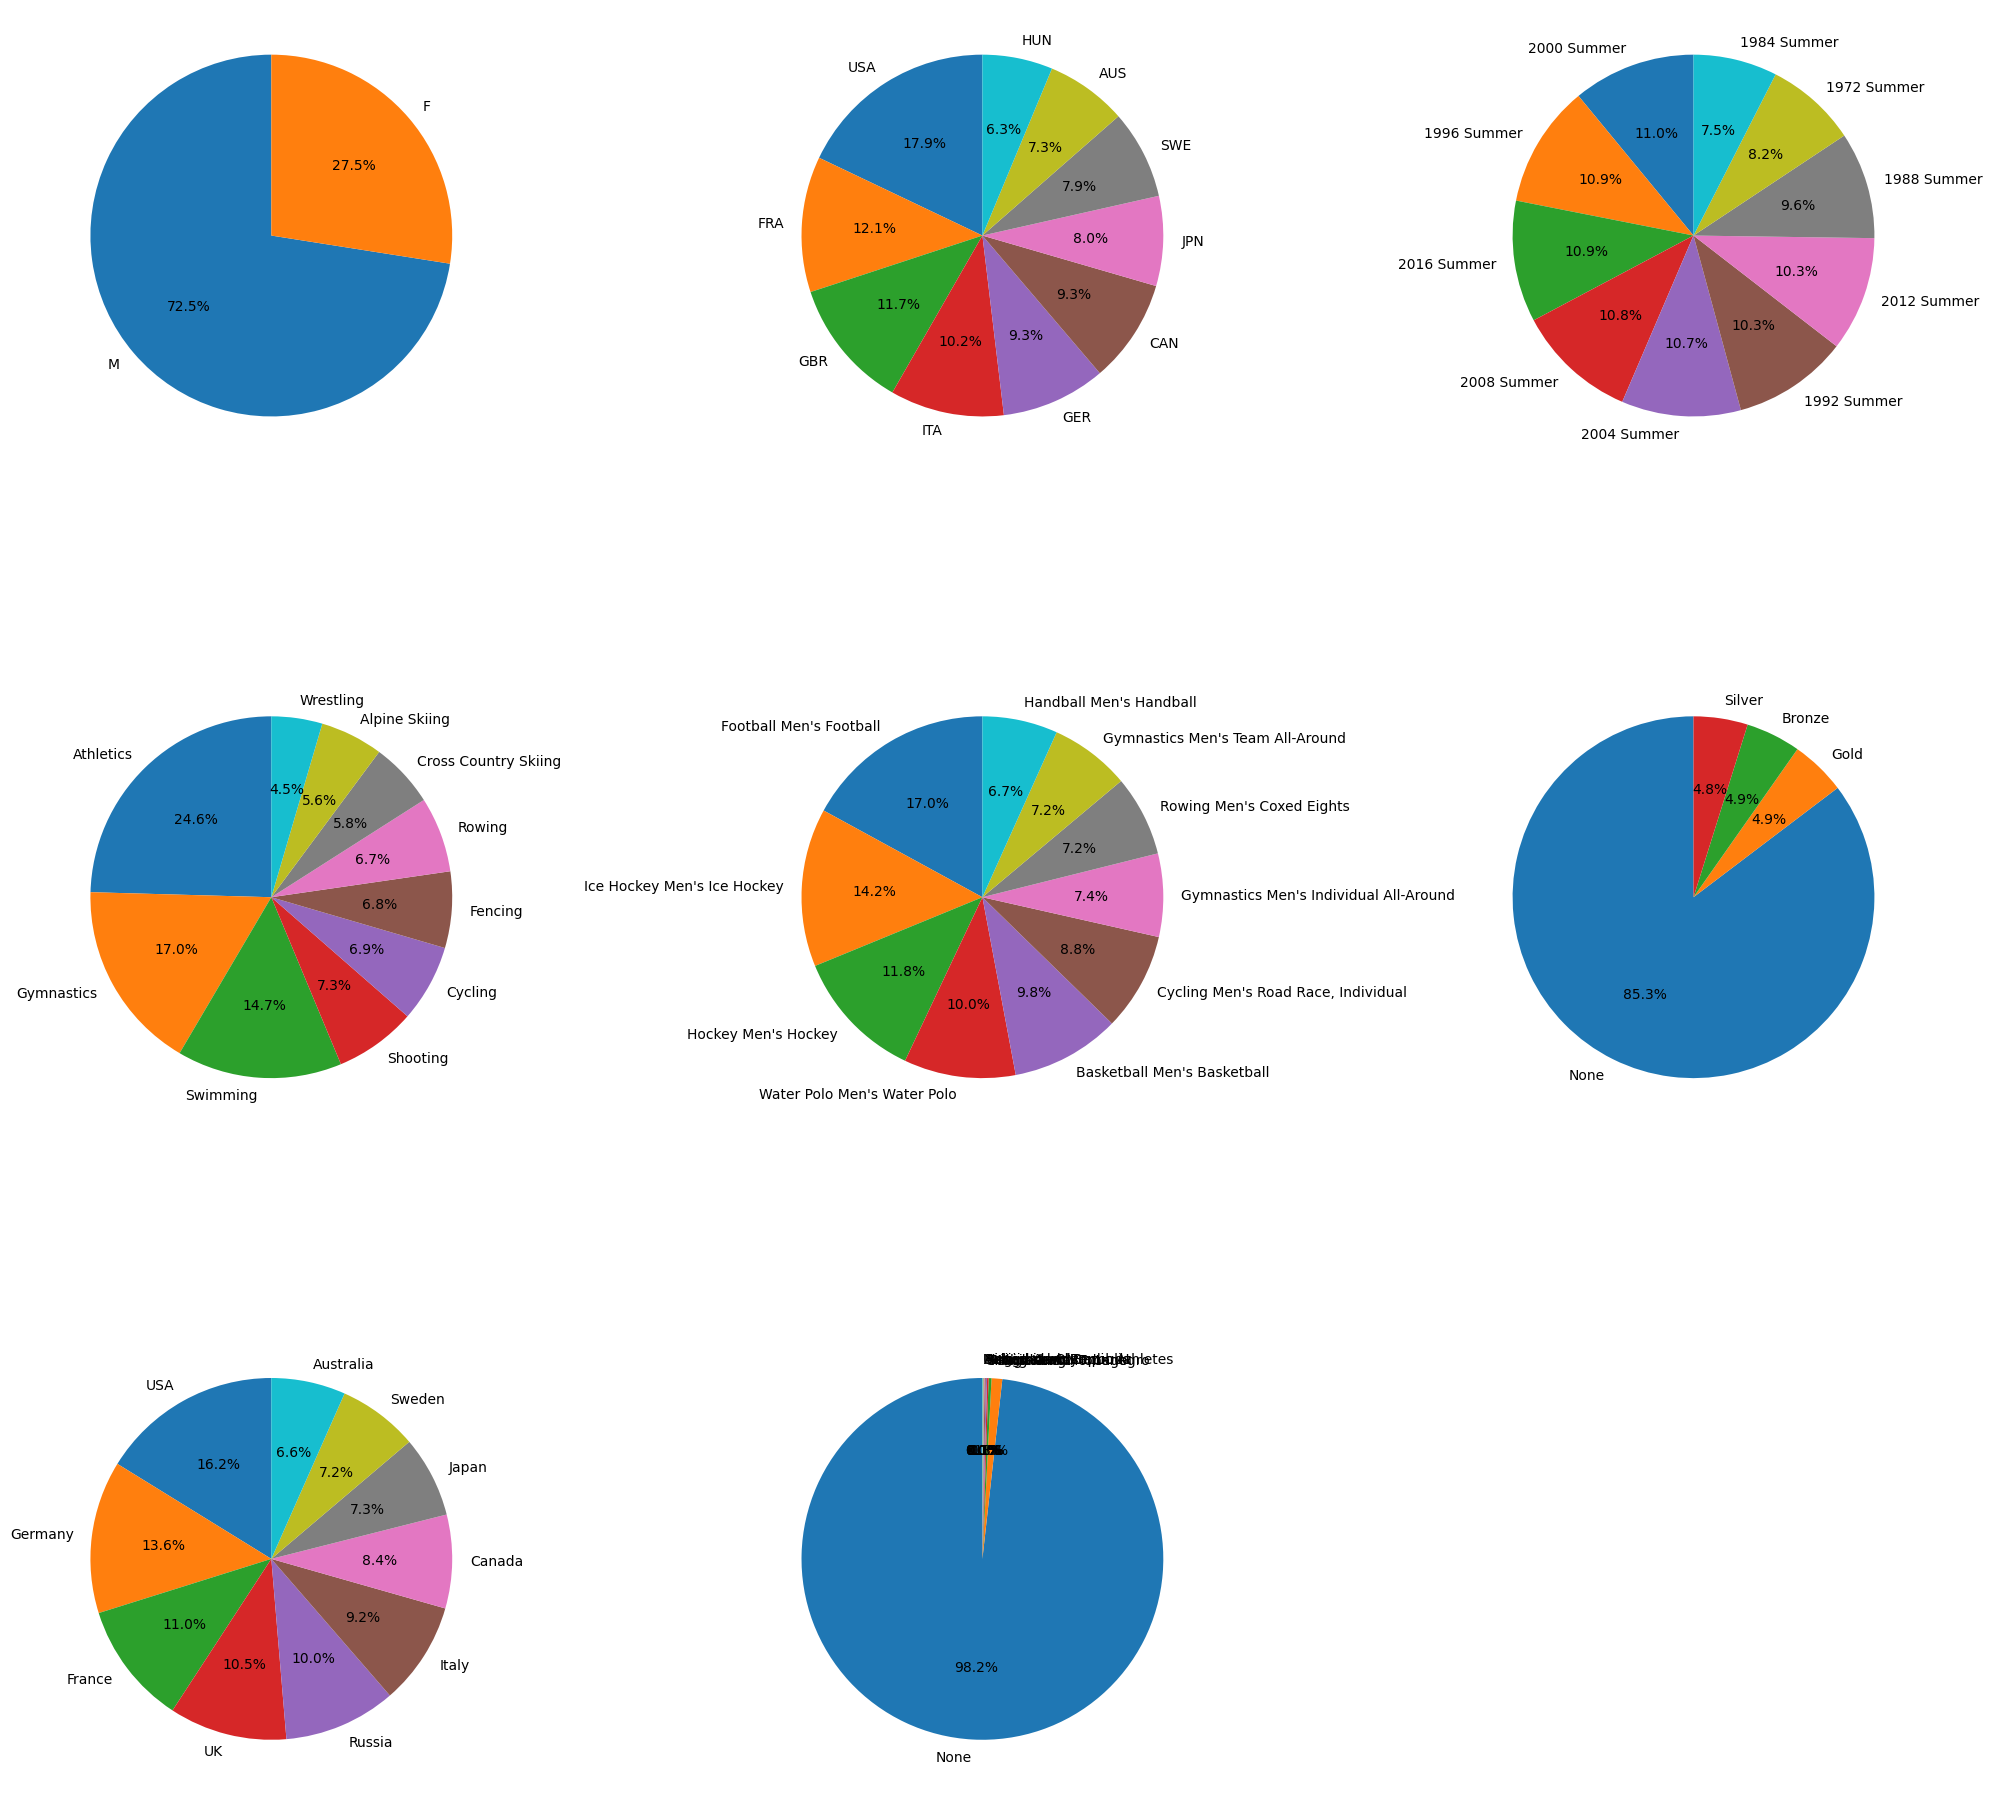

In [120]:
import matplotlib.pyplot as plt
import numpy as np

# List of categorical variables to plot
cat_vars = ['Sex', 'NOC', 'Games', 'Sport', 'Event', 'Medal', 'region', 'notes']

# Calculate the number of subplots required based on the number of categorical variables
num_plots = len(cat_vars)

# Calculate the number of rows and columns for subplots
num_rows = int(np.ceil(np.sqrt(num_plots)))
num_cols = int(np.ceil(num_plots / num_rows))

# Create a figure and axes
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# Flatten the axes array to simplify indexing
axs = axs.flatten()

# Create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
    unique_count = len(merged_oly[var].unique())  # Count unique values for the variable
    if unique_count > 10:
        top_10 = merged_oly[var].value_counts().nlargest(10).index.tolist()  # Get top 10 values
        data_subset = merged_oly[merged_oly[var].isin(top_10)]  # Filter the DataFrame
    else:
        data_subset = merged_oly
    # Count the occurrences of each category
    cat_counts = data_subset[var].value_counts()

    # Create pie chart
    if i < num_plots:
        axs[i].pie(cat_counts.values, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

# Remove any extra subplots if the number of categorical variables is less than the number of subplots
if num_plots < len(axs):
    for i in range(num_plots, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


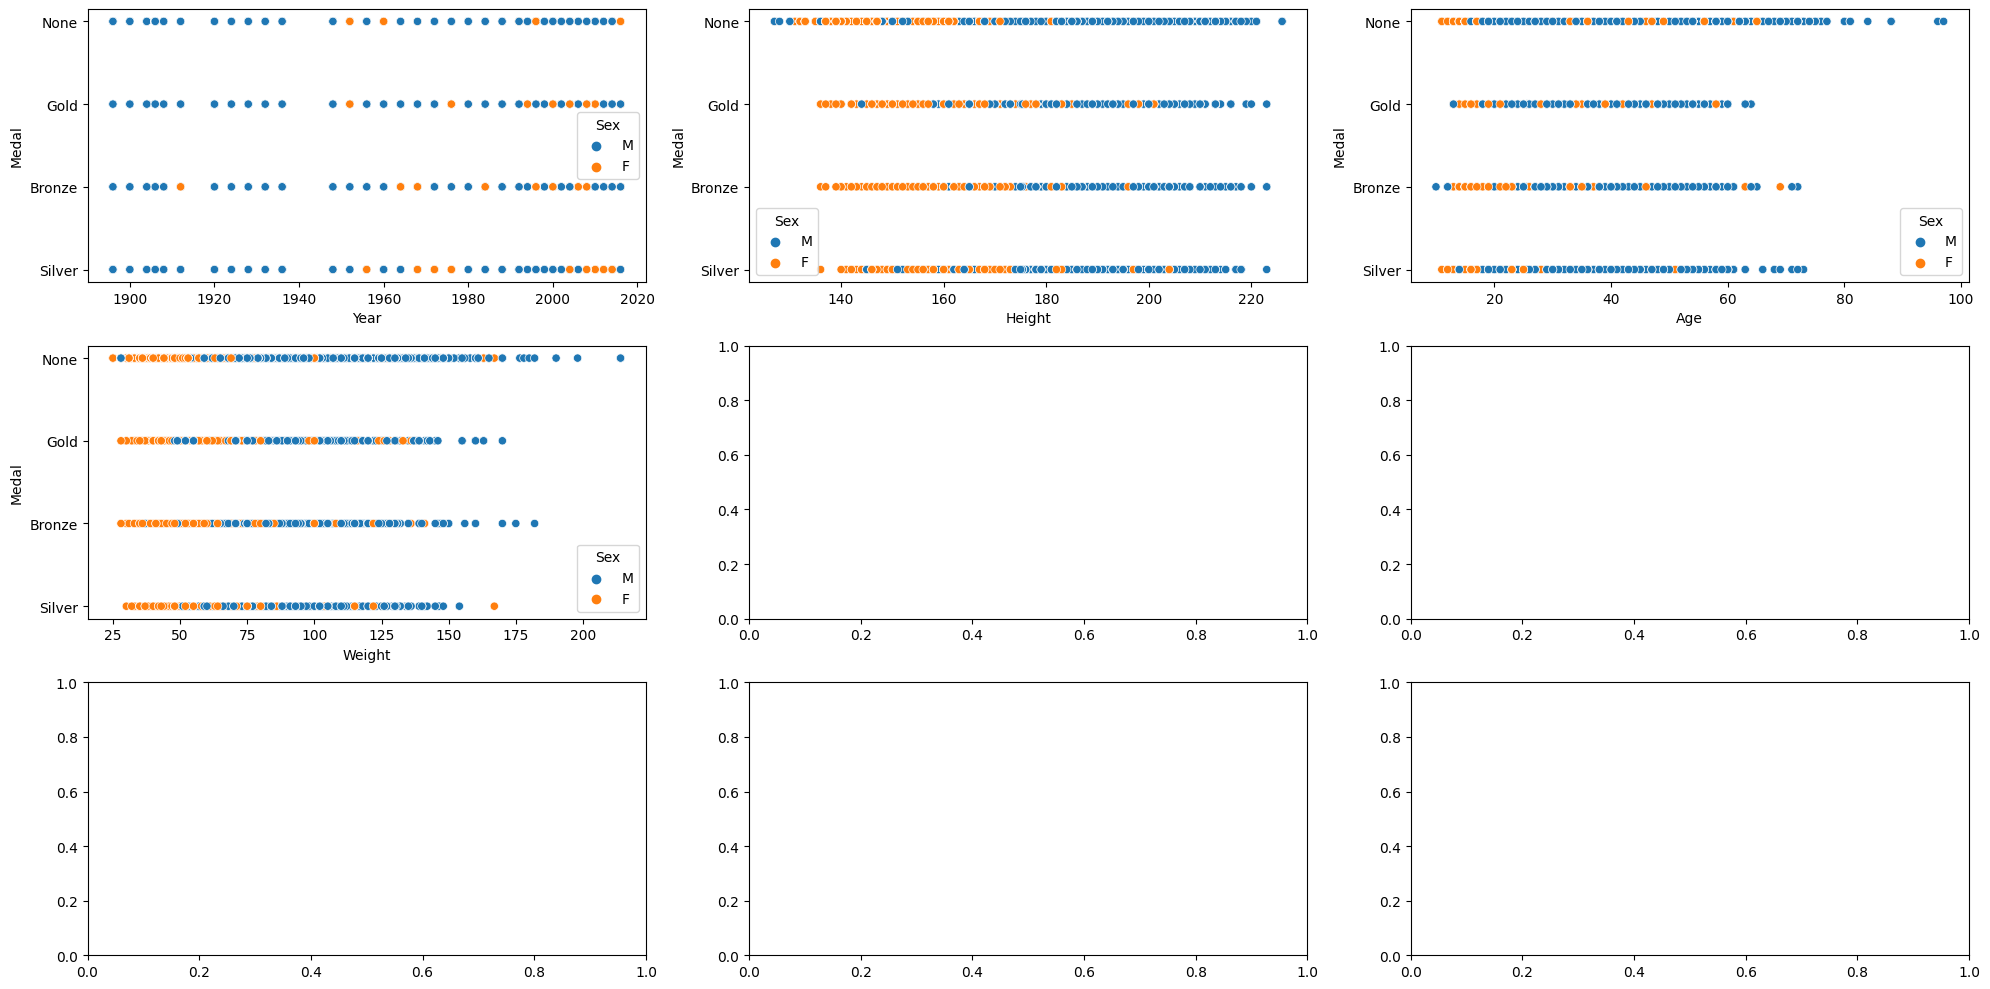

In [148]:
num_vars = ['Year', 'Height', 'Age', 'Weight']
# Calculate the number of subplots required based on the number of categorical variables
num_plots = len(cat_vars)

# Calculate the number of rows and columns for subplots
nrows = int(np.ceil(np.sqrt(num_plots)))
ncols = int(np.ceil(num_plots / num_rows))
fig, axs = plt.subplots(nrows, ncols , figsize = (20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
  sns.scatterplot(x = var, y = 'Medal', hue = 'Sex', data = merged_oly, ax = axs[i])

fig.tight_layout()
plt.show()

IndexError: ignored

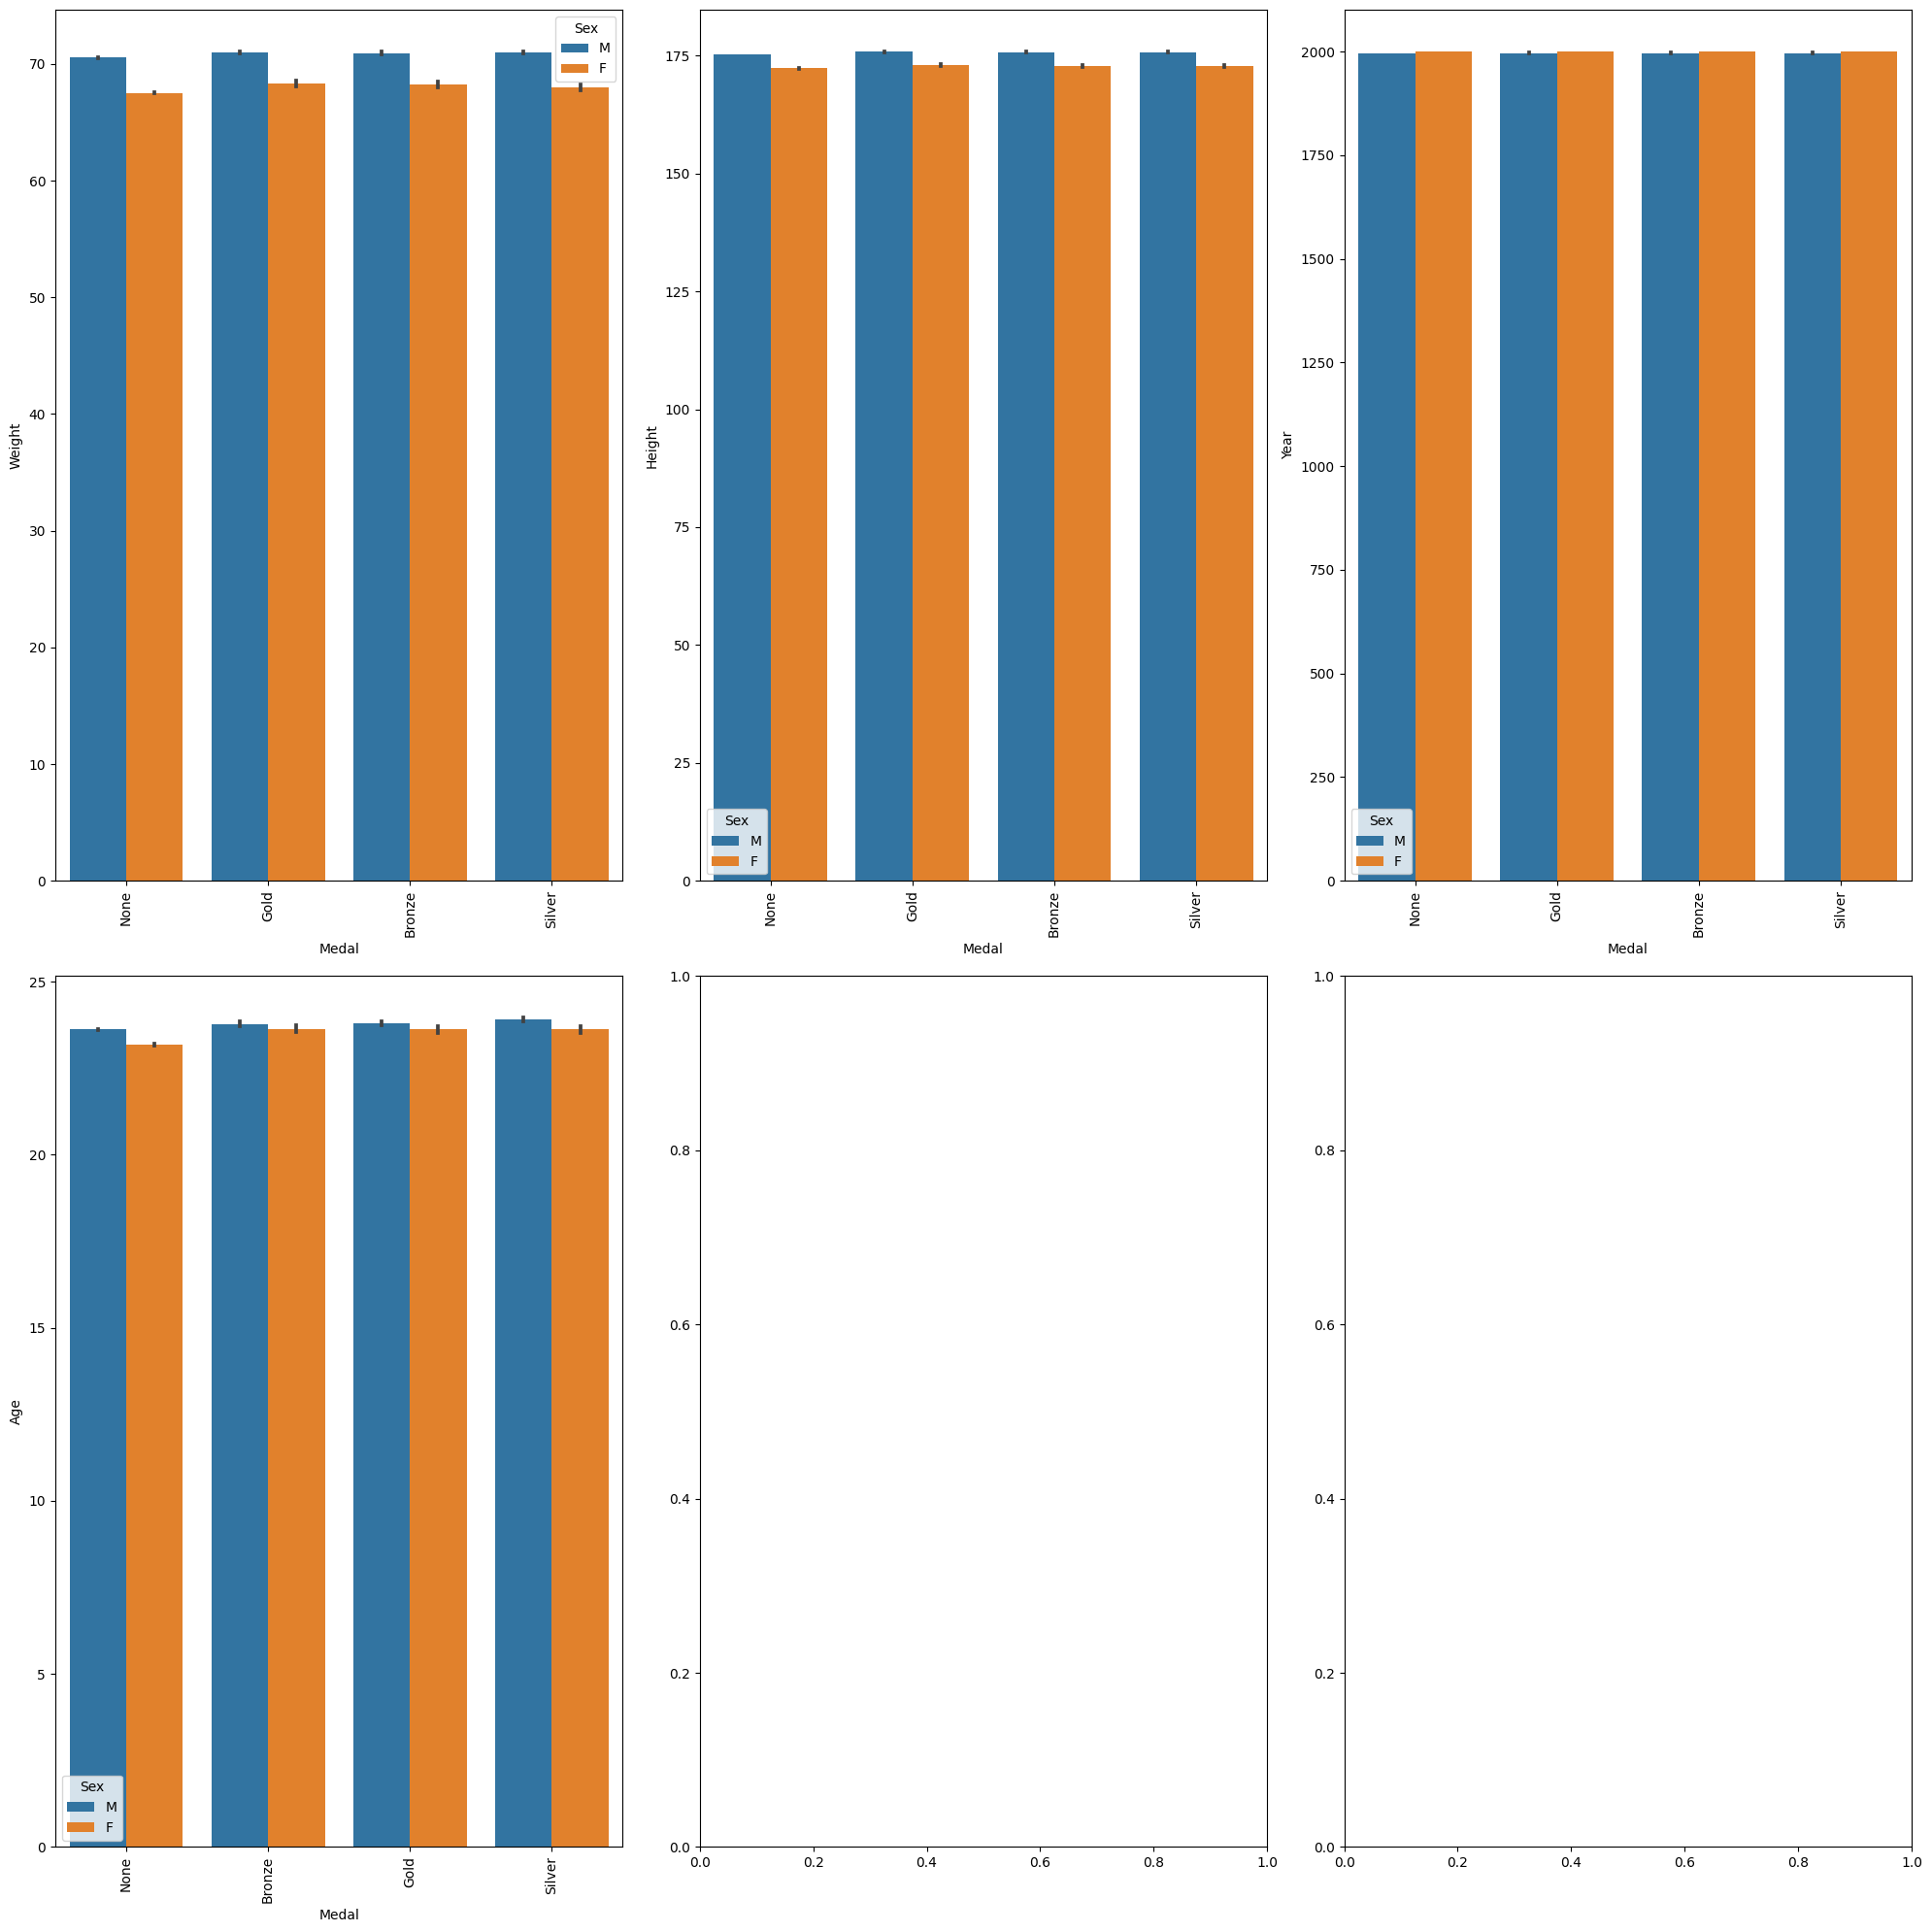

In [151]:
# List of categorical variables to plot
cat_vars = ['Weight', 'Height', 'Year', 'Age']

# Create a figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))
axs = axs.flatten()  # Instead of ravel(), use flatten() to reshape the array

# Create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    unique_count = len(merged_oly[var].unique())  # Count unique values for the variable
    if unique_count > 10:
        top_10 = merged_oly[var].value_counts().nlargest(10).index.tolist()  # Get top 10 values
        data_subset = merged_oly[merged_oly[var].isin(top_10)]  # Filter the DataFrame
    else:
        data_subset = merged_oly
    sns.barplot(x= 'Medal', y= var, hue ='Sex', data=data_subset, ax=axs[i], estimator=np.mean)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# Adjust spacing between subplots
fig.tight_layout()

# Remove the eighth subplot if not required
if len(cat_vars) < 8:
    fig.delaxes(axs[7])

# Remove the ninth subplot if not required
if len(cat_vars) < 9:
    fig.delaxes(axs[8])
    # Show plot
plt.show()

In [ ]:
merged_oly.Season.value_counts().sort_values(ascending=False)

In [24]:
#Top Countries participating
top_10_countries = oly_gam.Team.value_counts().sort_values(ascending=False).head(10)
top_10_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

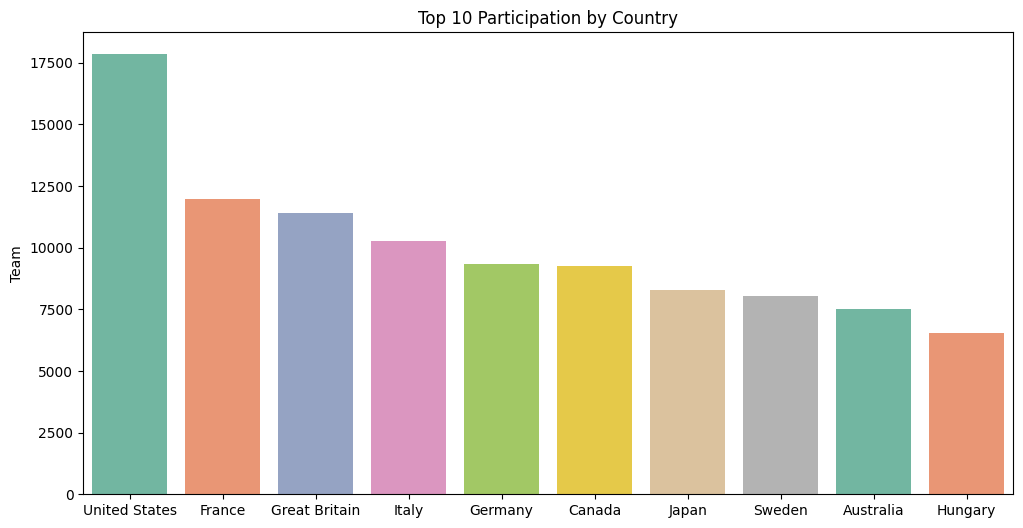

In [25]:
plt.figure(figsize=(12,6))
#plt.xticks(rotation=20)
plt.title('Top 10 Participation by Country')
sns.barplot(x=top_10_countries.index, y=top_10_countries, palette = 'Set2');

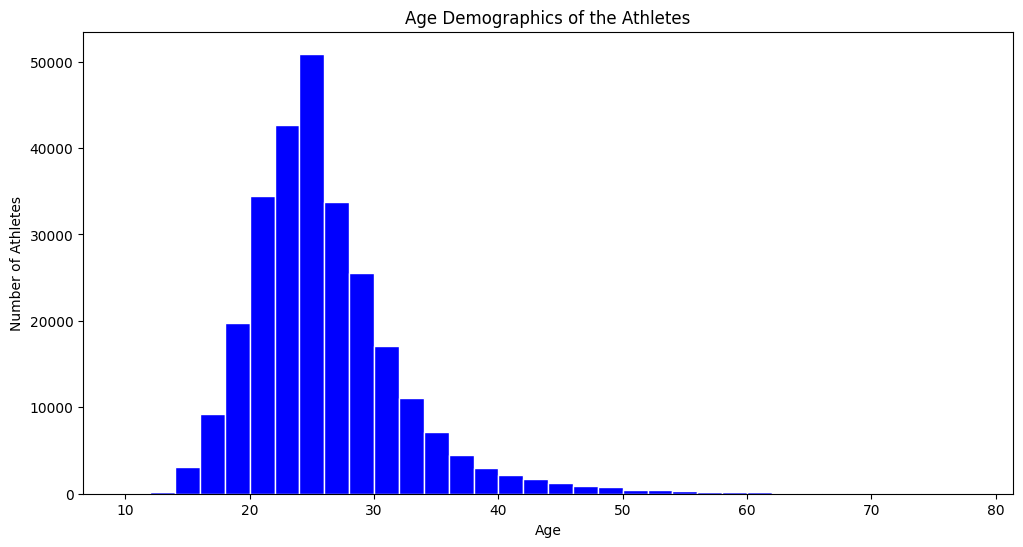

In [26]:
#Age Demographics of the Athletes
plt.figure(figsize=(12, 6))
plt.title("Age Demographics of the Athletes")
plt.xlabel('Age')
plt.ylabel('Number of Athletes')
plt.hist(oly_gam.Age, bins = np.arange(10,80,2), color='blue', edgecolor='white');

In [28]:
winter_sports = oly_gam[oly_gam.Season == 'Winter'].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [30]:
summer_sports = oly_gam[oly_gam.Season == 'Summer'].Sport.unique()
summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [31]:
#Gender Demographics
gender_counts = oly_gam.Sex.value_counts()
gender_counts

M    196594
F     74522
Name: Sex, dtype: int64

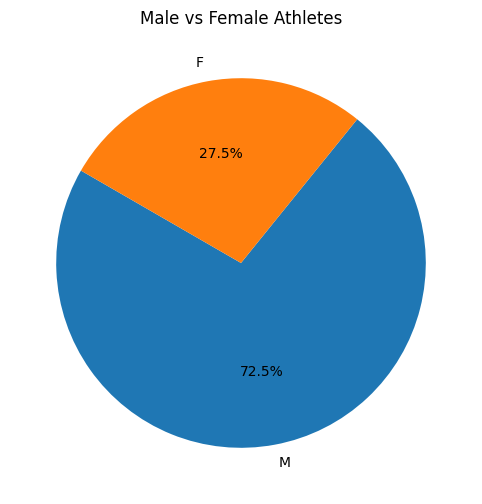

In [32]:
plt.figure(figsize=(12,6))
plt.title('Male vs Female Athletes')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=150);

In [33]:
#Total Medals
oly_gam.Medal.value_counts()

None      231333
Gold       13372
Bronze     13295
Silver     13116
Name: Medal, dtype: int64